In [1]:
import csv
import math

import matplotlib.pyplot as plt

In [2]:
class Particle:        
    def __init__(self, pt, eta, phi, mass, charge):
        self.pt = float(pt)
        self.eta = float(eta)
        self.phi = float(phi)
        self.mass = float(mass)
        self.charge = int(charge)

def event_reader(sourcePath: str) -> csv.DictReader:
    dimuons = []
    with open(sourcePath) as csvfile:
        events = csv.DictReader(csvfile)
        for event in events:
            muon1 = Particle(event["pt1"], event["eta1"], event["phi1"], event["M"], event["Q1"])
            muon2 = Particle(event["pt2"], event["eta2"], event["phi2"], event["M"], event["Q2"])
            dimuons.append((muon1, muon2))
    return dimuons

def jpsi_analysis():
    invMasses = []
    for muon1, muon2 in event_reader("data/df014_CsvDataSource_MuRun2010B.csv"):
        if (muon1.charge * muon2.charge != -1):
            continue

        invMass = math.sqrt(2 * muon1.pt * muon2.pt * (math.cosh(muon1.eta - muon2.eta) - math.cos(muon1.phi - muon2.phi)))

        jpsiLow = 2.95
        jpsiHigh = 3.25

        if invMass < jpsiLow or invMass > jpsiHigh:
            continue
        
        invMasses.append(invMass)
    return invMasses

3.095355083578199
3.1244595449902186
3.2110681213569716
3.137302753886771
3.0976840559556953
3.009482355006066
3.0799990253034957
3.141843740297061
3.1686492064639085
3.0664024123652345


[]

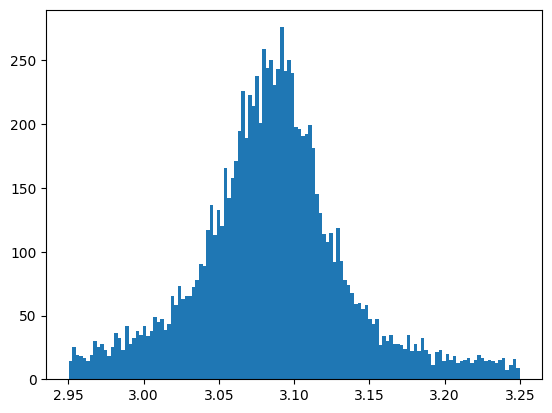

In [3]:
jpsi_results = jpsi_analysis()

for res in jpsi_results[:10]:
    print(res)

plt.hist(jpsi_analysis(), 128)
plt.plot()